In [ ]:
# подключаем библиотеки
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# загружаем набор данных
iris = load_iris()
X = iris.data
y = iris.target

# масштабируем данные
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# применяем LDA
lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

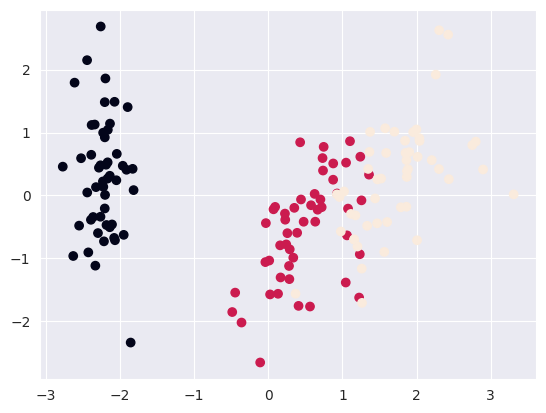

In [ ]:
# выводим результат по PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

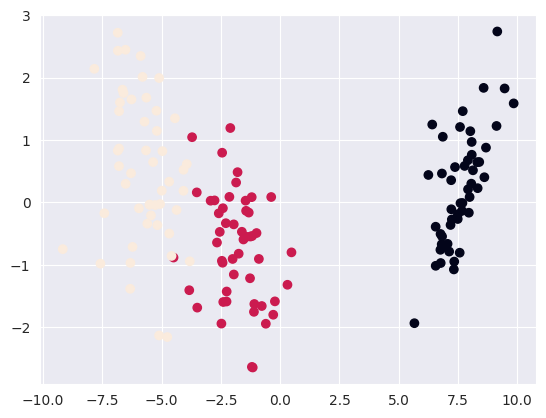

In [ ]:
# выводим результат по LDA
plt.scatter(X_lda[:,0], X_lda[:,1], c=y)

In [ ]:
# подключаем библиотеки
from sklearn.decomposition import TruncatedSVD

# загружаем dataset
iris = load_iris()
X = iris.data
y = iris.target

# масштабируем
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# применяем Truncate SVD
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

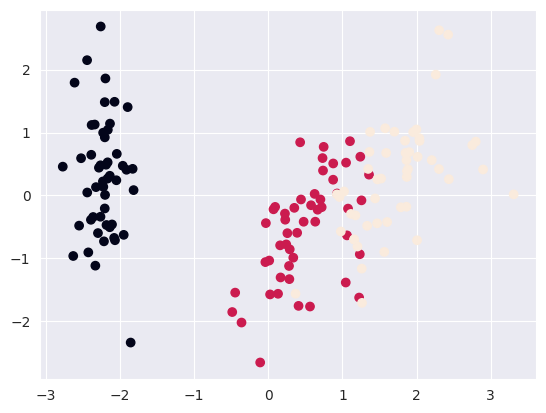

In [ ]:
# выводим результат по Truncate SVD
plt.scatter(X_svd[:,0], X_svd[:,1], c=y)

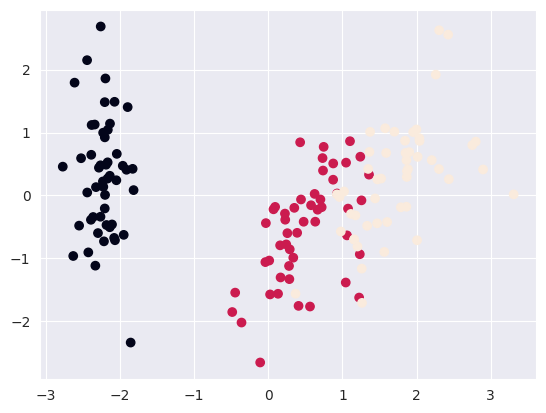

In [ ]:
# выводим результат по PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

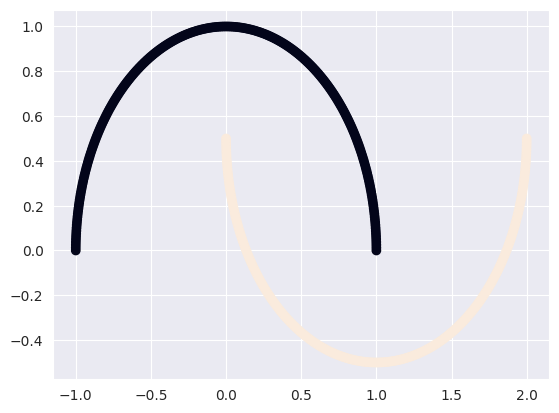

In [ ]:
# работа с нелинейностью
# подключаем библиотеки
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# загружаем dataset
X, y = make_moons(n_samples = 500, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# подключаем библиотеки
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# выбираем ядровые функции ('linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed')
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

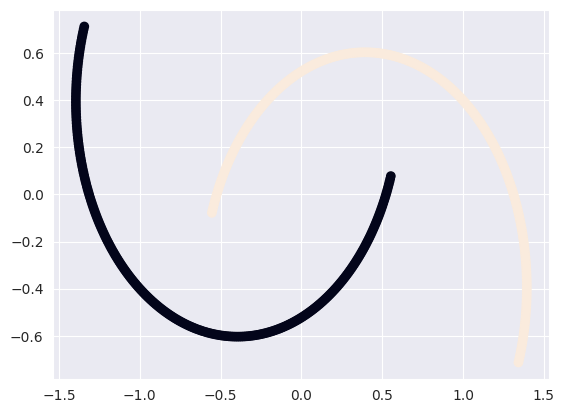

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

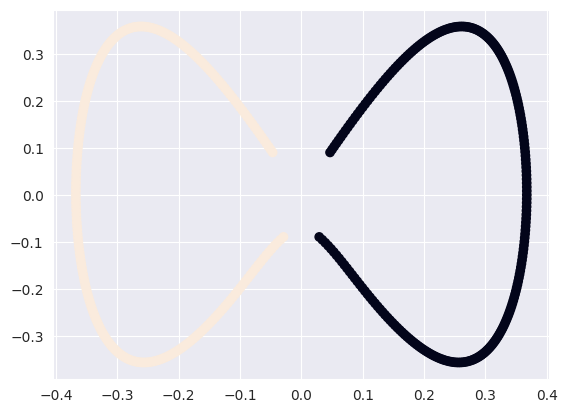

In [ ]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

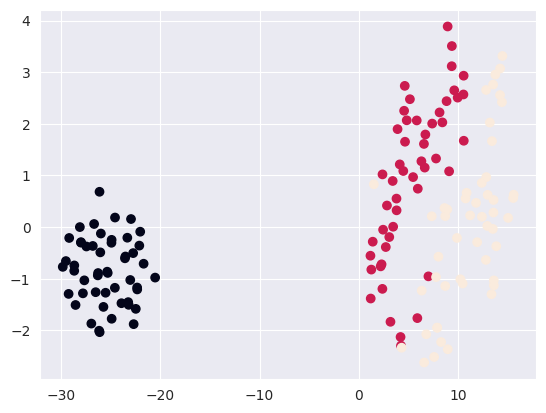

In [ ]:
# подключаем библиотеки
from sklearn.manifold import TSNE

# загружаем данные
iris = load_iris()
X = iris.data
y = iris.target

# масшабируем
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# вызов TSNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


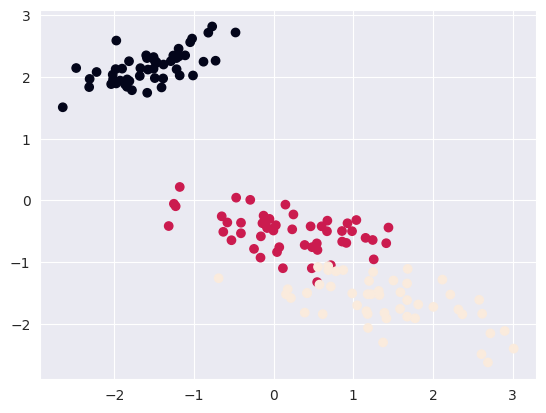

In [ ]:
# подключаем библиотеки
from sklearn.manifold import MDS

# загружаем данные
iris = load_iris()
X = iris.data
y = iris.target

# вызов MDS
mds = MDS(n_components=2, metric=True, random_state=2)
X_mds = mds.fit_transform(X)

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


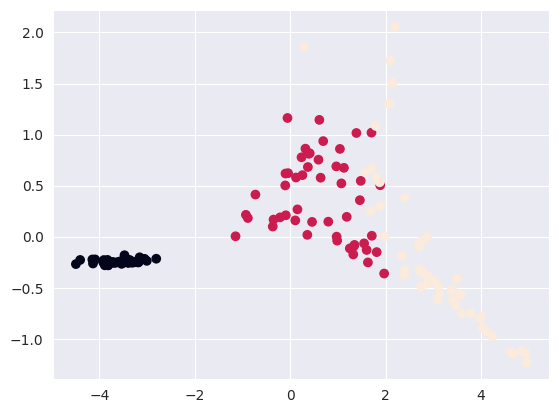

In [ ]:
# подключаем библиотеки
from sklearn.manifold import Isomap

# загружаем данные
iris = load_iris()
X = iris.data
y = iris.target

# вызов isomap
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2



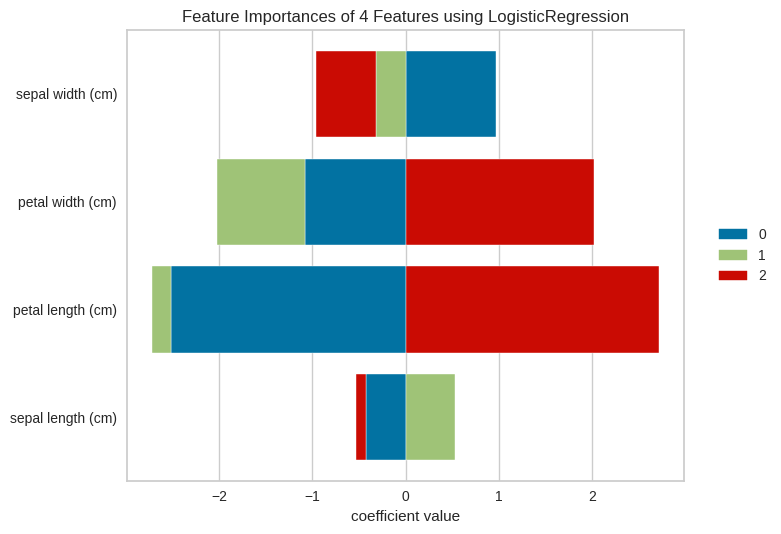

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>,
                   estimator=LogisticRegression(max_iter=150),
                   labels=['sepal length (cm)', 'sepal width (cm)',
                           'petal length (cm)', 'petal width (cm)'],
                   relative=False, stack=True)


In [ ]:
# backward elimination
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances

# загружаем dataset
iris = load_iris()
X = iris.data
y = iris.target

estimator = LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X, y)
X_selected = selector.transform(X)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(X_selected).head())
print()
print(feature_importances(estimator, X, y, stack=True,
                          labels=iris.feature_names, relative=False))